In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, cmap='YlOrBr'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
# Load the csv file into a pandas dataframe
wr_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data-Collection/wr/wr_college_summary.csv')

In [ ]:
# Create a new column 'Target' with default value of 0
wr_df['Target'] = 0

# Set the value of 'Target' to 1 where 'Top_24_Seasons' has value 1 or greater
wr_df.loc[wr_df['Top_24_Seasons'] >= 1, 'Target'] = 1

y_wr = wr_df['Target']
wr_df = wr_df.drop(['Top_24_Seasons', 'Target', 'Player'], axis=1)

In [ ]:
print(len(wr_df))

470


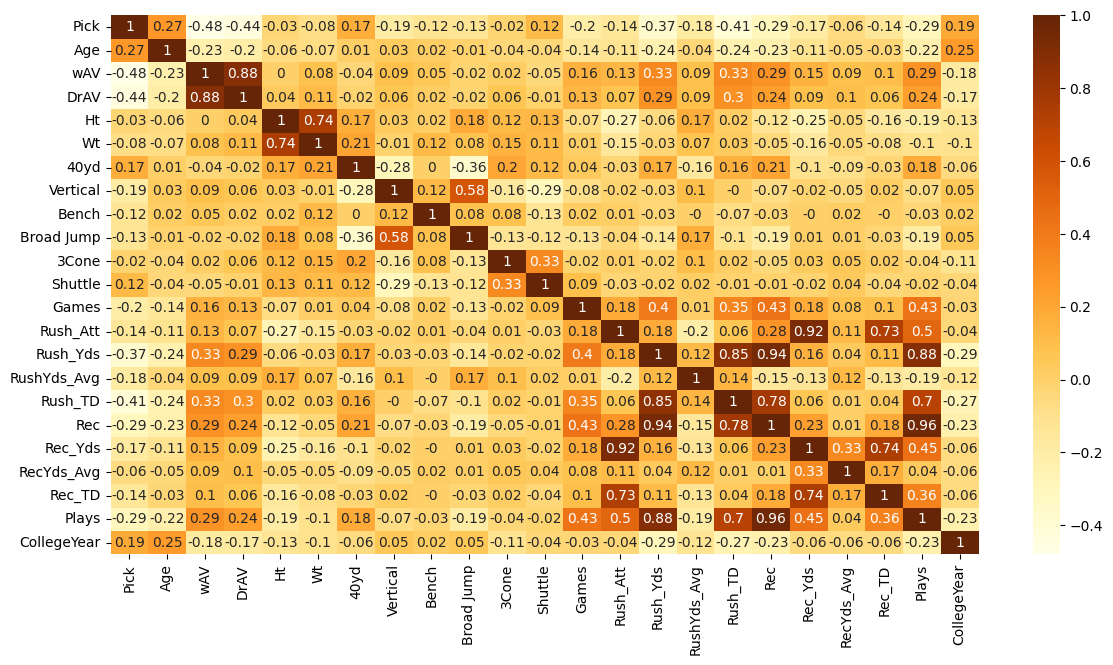

In [ ]:
# Calculate and visualize correlation matrix
corr_matrix = wr_df.corr().round(2)
plt.figure(figsize=(14, 7))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrBr')

plt.show()

In [ ]:
# Split the data to test and training with 80/20 split.
X_train, X_test, y_train, y_test = train_test_split(wr_df, y_wr, random_state=42)

# Normalize the dataset to zero mean and unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Recall: 0.667
Precision: 0.923
Accuracy: 0.941
Confusion matrix, without normalization


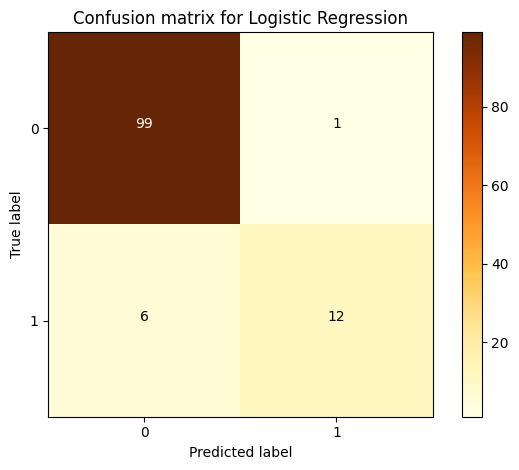

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Instantiate a Logistic Regression model. The first attempts did not converge even with scaled data. 
log_reg = LogisticRegression(max_iter=5000, random_state=42) # Increase max iterations by a factor of 10.

# Fit the model on the training set
log_reg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)

# Calculate and print confusion matrix and other test scores
confusion_lr = confusion_matrix(y_test, y_pred)
print('Recall: {:.3f}'.format(recall_score(y_test, y_pred)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))

plot_confusion_matrix(confusion_lr, classes=['0','1'])
plt.title('Confusion matrix for Logistic Regression')
plt.show()




In [ ]:
# Extract the feature importances
importances = log_reg.coef_[0]

# Create a list of the feature names and their importances
feature_names = list(X_train.columns)
features_importances = list(zip(feature_names, importances))

# Sort the features by importance (in descending order)
sorted_features_importances = sorted(features_importances, key=lambda x: x[1], reverse=True)

# Print the list of the most important features
print("List of the most important features:")
for feature, importance in sorted_features_importances:
    print(f"{feature}: {importance:.3f}")

List of the most important features:
wAV: 2.761
DrAV: 1.055
Rush_TD: 0.405
RecYds_Avg: 0.390
Wt: 0.297
Plays: 0.264
Games: 0.246
Shuttle: 0.156
Ht: 0.106
Rush_Att: 0.102
40yd: 0.095
Vertical: 0.087
Bench: 0.014
Rec: -0.052
RushYds_Avg: -0.087
Rec_Yds: -0.170
Rec_TD: -0.195
CollegeYear: -0.195
Age: -0.221
Broad Jump: -0.383
3Cone: -0.407
Rush_Yds: -0.719
Pick: -0.722


Recall: 0.556
Precision: 0.909
Accuracy: 0.924
Confusion matrix, without normalization


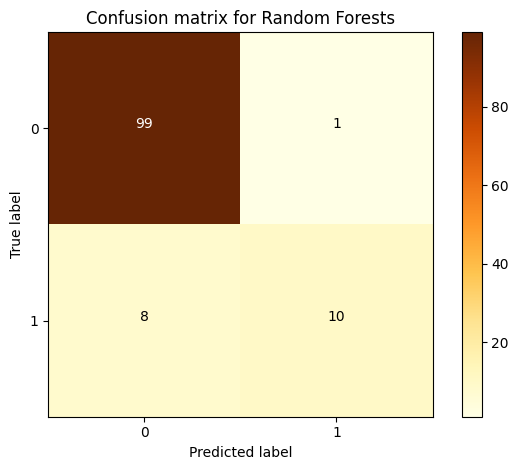

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42).fit(X_train_scaled, y_train)

# sum(y_test)
# clf.score(X_test, y_test)

y_predicted = clf.predict(X_test_scaled)
confusion = confusion_matrix(y_test, y_predicted)
#confusion
#sum(y_predicted)

print('Recall: {:.3f}'.format(recall_score(y_test, y_predicted)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_predicted)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_predicted)))
confusion_rf = confusion_matrix(y_test, y_predicted)
plot_confusion_matrix(confusion_rf, classes=['0','1'])
plt.title('Confusion matrix for Random Forests')
plt.show()


In [ ]:
# Extract feature importances from the trained random forest model
importances = clf.feature_importances_

# Create a list of feature names and importances
feature_importances = list(zip(X_test.columns, importances))

# Sort the feature importances in descending order
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Print the list of most important features
print("List of most important features:")
for feature, importance in feature_importances:
    print(f"{feature}: {importance}")

List of most important features:
wAV: 0.364013817344389
DrAV: 0.21155229724506538
Pick: 0.06333984379934762
Rush_Yds: 0.03043068213618031
Rush_TD: 0.030325299808621257
RecYds_Avg: 0.02734807311870374
Games: 0.02568762192704116
Plays: 0.0246227464506763
Wt: 0.024482956289761437
Rec: 0.02328203540681062
Broad Jump: 0.01898011408287776
40yd: 0.01623496759179084
Bench: 0.01595044410844811
3Cone: 0.014880524148660942
RushYds_Avg: 0.014629609459480594
Age: 0.014453918119156788
Vertical: 0.013389443359636601
Rush_Att: 0.012962916591894715
Shuttle: 0.012807171592410228
Rec_Yds: 0.011595586130417154
Rec_TD: 0.010947617197983674
Ht: 0.010351866085990084
CollegeYear: 0.0077304480046558495


Recall: 0.389
Precision: 1.000
Accuracy: 0.907
Confusion matrix, without normalization


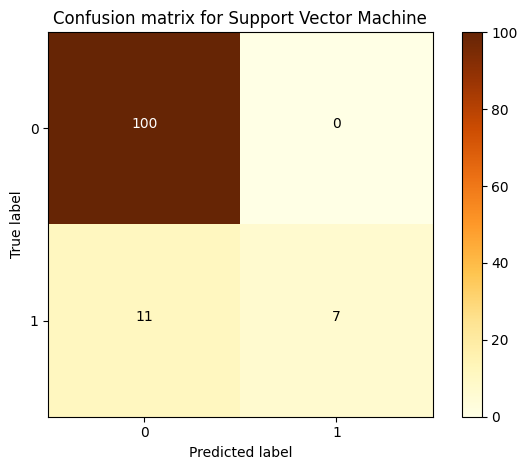

In [ ]:
from sklearn.svm import SVC

# Instantiate an SVM model with default hyperparameters
svm = SVC(random_state=42)

# Fit the model on the training set
svm.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test_scaled)

# Calculate and print confusion matrix and other test scores
confusion_svm = confusion_matrix(y_test, y_pred)
print('Recall: {:.3f}'.format(recall_score(y_test, y_pred)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
plot_confusion_matrix(confusion_svm, classes=['0','1'])
plt.title('Confusion matrix for Support Vector Machine')
plt.show()

Recall: 0.667
Precision: 0.750
Accuracy: 0.915
Confusion matrix, without normalization


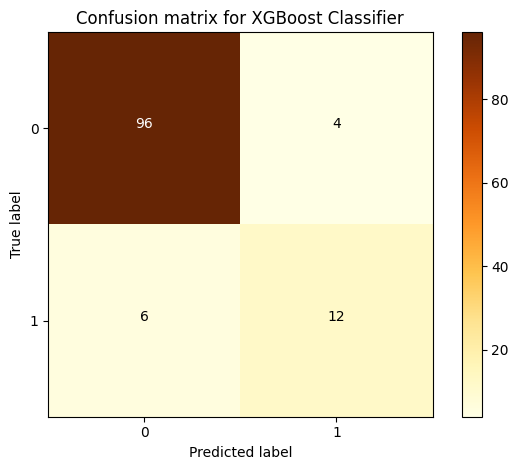

In [ ]:
import xgboost as xgb

# Create an XGBoost classifier
clf = xgb.XGBClassifier(random_state=42)

# Fit the classifier on the training set
clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

# Calculate and print confusion matrix and other test scores
confusion_xgb = confusion_matrix(y_test, y_pred)
print('Recall: {:.3f}'.format(recall_score(y_test, y_pred)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))


# Plot confusion matrix
plot_confusion_matrix(confusion_xgb, classes=['0','1'])
plt.title('Confusion matrix for XGBoost Classifier')
plt.show()